In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
ipl_data=pd.read_csv("/content/matches.csv")

In [60]:
#print first 5 rows
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [61]:
#print last 5 rows
ipl_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [62]:
#check missing values
ipl_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [63]:
matches_data=ipl_data.where((pd.notnull(ipl_data))," ")

In [64]:
matches_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [65]:
matches_data.shape

(636, 18)

In [66]:
#get top highest player of matches
matches_data["player_of_match"].value_counts()

CH Gayle           18
YK Pathan          16
AB de Villiers     15
DA Warner          15
RG Sharma          14
                   ..
KMDN Kulasekara     1
MR Marsh            1
SA Yadav            1
CL White            1
SP Goswami          1
Name: player_of_match, Length: 202, dtype: int64

In [20]:
#get top 10 player of the matches
matches_data["player_of_match"].value_counts()[0:5]

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
Name: player_of_match, dtype: int64

In [67]:
list(matches_data["player_of_match"].value_counts()[0:5].keys())

['CH Gayle', 'YK Pathan', 'AB de Villiers', 'DA Warner', 'RG Sharma']

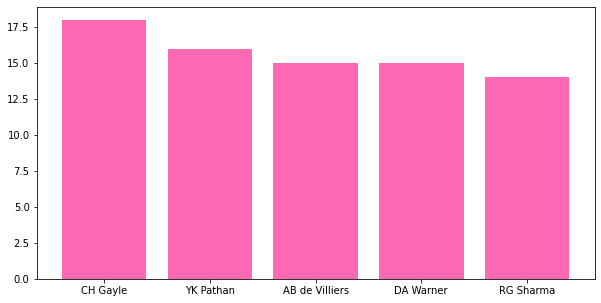

In [68]:
#draw a bar graph
plt.figure(figsize=(10,5))
plt.bar(list(matches_data["player_of_match"].value_counts()[0:5].keys()),list(matches_data["player_of_match"].value_counts()[0:5]), color="hotpink")
plt.show()

In [69]:
#getting the frequency of result
matches_data["result"].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [70]:
#finding out number of toss wins w.r.t each team
matches_data["toss_winner"].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [71]:
#extracting the records where team won batting first
batting_first=matches_data[matches_data["win_by_runs"]!=0]

In [72]:
#print head
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,


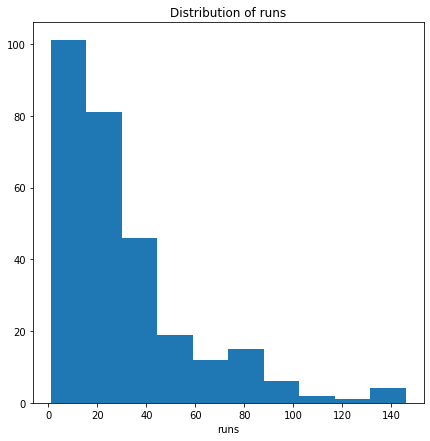

In [73]:
#making histogram
plt.figure(figsize=(7,7))
plt.hist(batting_first["win_by_runs"])
plt.title("Distribution of runs")
plt.xlabel("runs")
plt.show()

In [74]:
#finding out number of wins w.r.t each team after batting first
batting_first["winner"].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

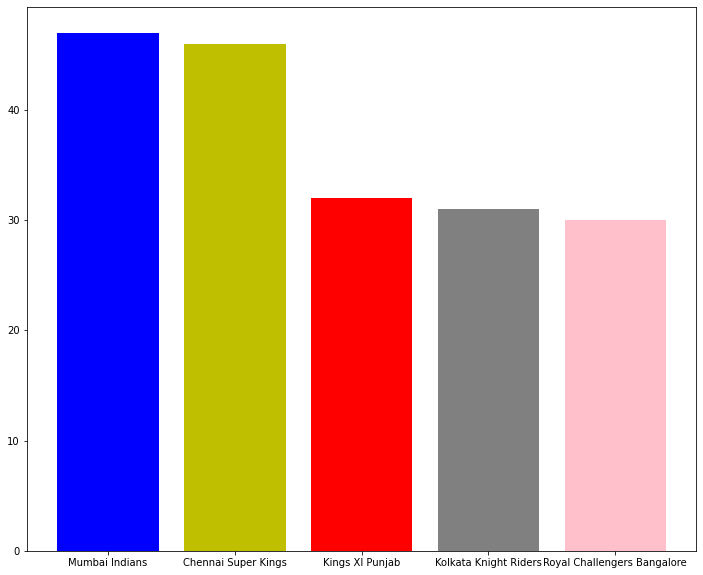

In [75]:
#making barplot top 5 with most wins after batting first
plt.figure(figsize=(12,10))
plt.bar(list(batting_first["winner"].value_counts()[0:5].keys()),list(batting_first["winner"].value_counts()[0:5]),color=["blue","y","r","grey","pink"])
plt.show()

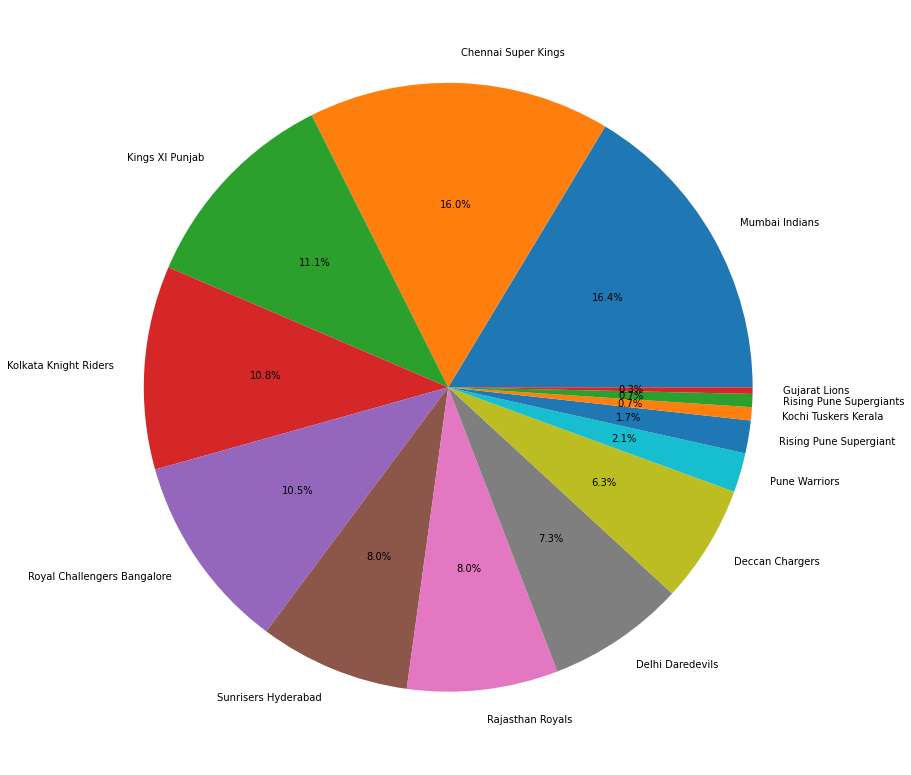

In [90]:
#draw piechart
plt.figure(figsize=(15,14))
plt.pie(list(batting_first["winner"].value_counts()), labels=list(batting_first["winner"].value_counts().keys()),autopct="%.1f%%")
plt.show()

In [77]:
#Extracting those records where team has won after batting second
batting_second=matches_data[matches_data["win_by_wickets"]!=0]

In [78]:
#getting head
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,


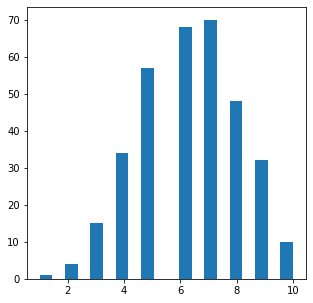

In [79]:
#draw histogram
plt.figure(figsize=(5,5))
plt.hist(batting_second["win_by_wickets"],bins=20)
plt.show()

In [80]:
#finding out frequency of number of wins after batting second
batting_second["winner"].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

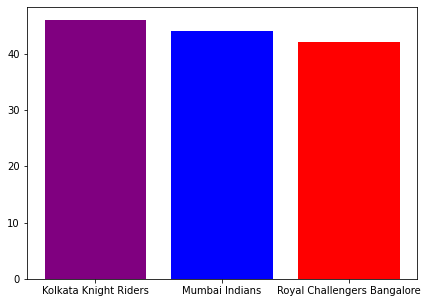

In [87]:
#create bar plot w.r.t number of wins 
plt.figure(figsize=(7,5))
plt.bar(list(batting_second["winner"].value_counts()[0:3].keys()),list(batting_second["winner"].value_counts()[0:3]),color=["purple","blue","red"])
plt.show()

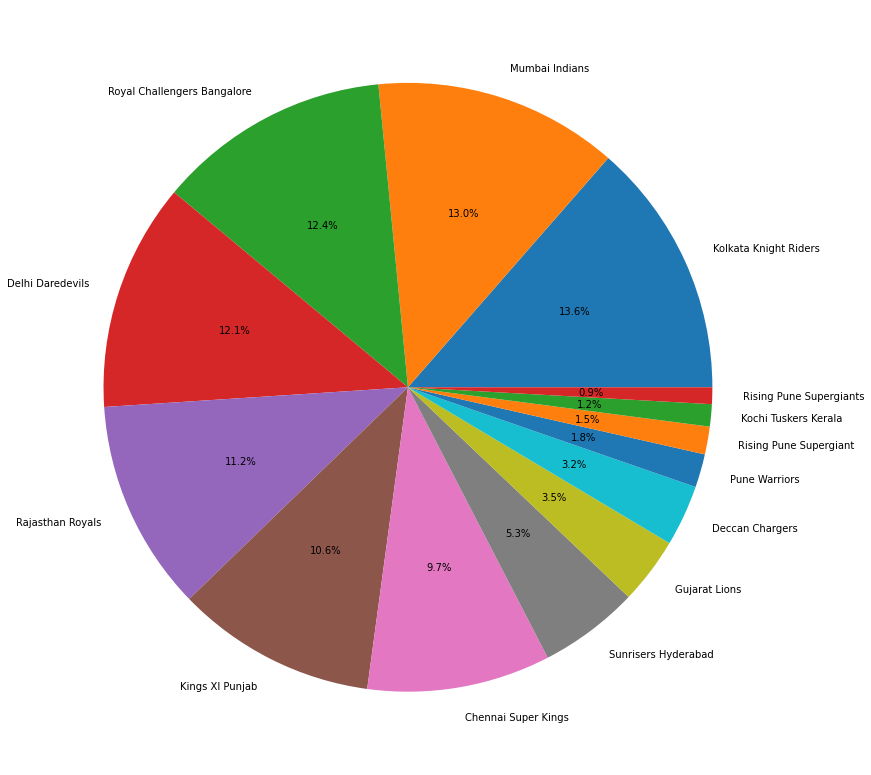

In [89]:
#draw piechart
plt.figure(figsize=(15,14))
plt.pie(list(batting_second["winner"].value_counts()),labels=list(batting_second["winner"].value_counts().keys()),autopct="%.1f%%")
plt.show()


In [92]:
#looking at the number of matches played at each season
matches_data["season"].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [93]:
#looking at the number of matches played at each of the city
matches_data["city"].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
                   7
Cuttack            7
Ranchi             7
Port Elizabeth     7
Cape Town          7
Abu Dhabi          7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64

In [95]:
#finding out how many times a team won after winning the toss
np.sum(matches_data["toss_winner"]==matches_data["winner"])

325

In [96]:
#import deliveries dataset
deliveries=pd.read_csv("/content/deliveries.csv")

In [98]:
#print first 5 rows
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [99]:
#print last 5 rows
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [100]:
#check null values
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [101]:
my_deliveries=deliveries.where((pd.notnull(deliveries)),"")

In [102]:
my_deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [103]:
#check dissmissal kind
my_deliveries["dismissal_kind"].value_counts()

                         143022
caught                     4373
bowled                     1382
run out                     755
lbw                         455
stumped                     243
caught and bowled           211
retired hurt                  9
hit wicket                    9
obstructing the field         1
Name: dismissal_kind, dtype: int64

In [104]:
#print fielder
my_deliveries["fielder"].value_counts()

                  145091
KD Karthik           127
MS Dhoni             126
RV Uthappa           115
AB de Villiers       101
                   ...  
LH Ferguson            1
P Suyal                1
DL Chahar              1
R Bishnoi              1
R Shukla (sub)         1
Name: fielder, Length: 452, dtype: int64

In [105]:
#print player_dismissed
my_deliveries["player_dismissed"].value_counts()

                  143022
SK Raina             134
G Gambhir            131
RG Sharma            129
RV Uthappa           128
                   ...  
Sandeep Sharma         1
B Laughlin             1
Shivam Sharma          1
Shoaib Akhtar          1
NL McCullum            1
Name: player_dismissed, Length: 437, dtype: int64

In [107]:
#check match_id
my_deliveries["match_id"].value_counts().unique()

array([267, 263, 262, 261, 259, 258, 257, 256, 255, 254, 253, 252, 251,
       250, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238,
       237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225,
       224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 212, 211,
       209, 207, 206, 205, 204, 203, 202, 200, 199, 198, 197, 196, 195,
       193, 187, 186, 185, 183, 181, 175, 171, 161, 159, 157, 151, 142,
       136, 130, 128, 127, 126, 123, 108, 106, 100,  63])

In [110]:
runs_extra=my_deliveries[my_deliveries["extra_runs"]!=0]
runs_extra.head()
runs_extra.value_counts()

match_id  inning  batting_team                 bowling_team                 over  ball  batsman        non_striker  bowler      is_super_over  wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  dismissal_kind  fielder
636       2       Royal Challengers Bangalore  Sunrisers Hyderabad          20    4     Iqbal Abdulla  Sachin Baby  B Kumar     0              0          0         1            0            0             0             1           1                                                        1
221       1       Mumbai Indians               Delhi Daredevils             16    3     AT Rayudu      JP Duminy    A Mishra    0              0          0         1            0            0             0             1           1                                                        1
197       2       Royal Challengers Bangalore  Delhi Daredevils             1     1     MK Pandey      JH Kallis    DP Nannes   0         

In [111]:
#counts non_striker
my_deliveries["non_striker"].value_counts()


G Gambhir           3635
SK Raina            3483
V Kohli             3351
RG Sharma           3306
S Dhawan            3248
                    ... 
PM Sarvesh Kumar       1
S Randiv               1
TP Sudhindra           1
BW Hilfenhaus          1
TA Boult               1
Name: non_striker, Length: 458, dtype: int64

In [114]:
#check number of super over
super_has=my_deliveries[my_deliveries["is_super_over"]!=0]
super_has.value_counts()

match_id  inning  batting_team         bowling_team                 over  ball  batsman      non_striker     bowler         is_super_over  wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  dismissal_kind  fielder
536       4       Rajasthan Royals     Kings XI Punjab              1     4     JP Faulkner  SPD Smith       MG Johnson     1              0          0         0            0            0             0             0           0           JP Faulkner       run out                    1
388       3       Sunrisers Hyderabad  Royal Challengers Bangalore  1     7     CL White     NLTC Perera     R Vinay Kumar  1              0          0         0            0            0             2             0           2                                                        1
126       4       Rajasthan Royals     Kolkata Knight Riders        1     2     YK Pathan    AD Mascarenhas  BAW Mendis     1              0          